In [1]:
import os 
os.chdir("C:\\Users\\Microsoft\\AppData\\Local\\Programs\\Python\\Python310\\Scripts\\w6_img")

In [2]:
# setup 

import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility,
np.random.seed(99)

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

# Q1

Write a program to segment the boat and the people on it from the background. Follow the instruction below:
Use 'boat.jpg' as input.
Apply Otsu thresholding.
Draw bounding box to identify the region where the boat and people are located.

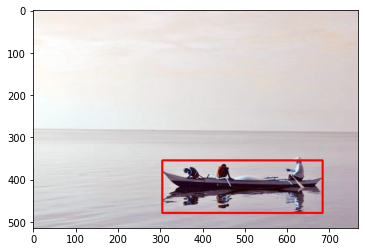

In [3]:
img = cv.imread('boat.jpg')
grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, th1 = cv.threshold(grayscale, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)  #Otsu thresholding
#bounding box
x, y, w, h = cv.boundingRect(th1)
img2 = cv.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 3)
plt.imshow(img2)


# Q2

Write a program to visualize the effect of size of structuring element on the morphological transformation (e.g. erosion, dilation, opening, and closing).

Load the 'leaf.jfif' and perform thresholding to segment the leaf from the background.
Create a GUI containing trackbar to control the size of structuring element and display the resulting image on a window alongside the trackbar.

In [4]:
img = cv.imread('leaf.jfif')
grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret, th1 = cv.threshold(grayscale, 0, 255, cv.THRESH_BINARY) #thresholding

def trackbar(x):
    kernel = np.ones((x,x), dtype = np.uint8)    
    erosion = cv.erode(grayscale, kernel, iterations = 1)
    dilation = cv.dilate(grayscale, kernel, iterations = 1)
    opening = cv.morphologyEx(grayscale, cv.MORPH_OPEN, kernel)
    closing = cv.morphologyEx(grayscale, cv.MORPH_CLOSE, kernel)    
    cv.imshow('erosion/dilation/opening/closing', np.hstack([erosion, dilation, opening, closing]))

    
cv.namedWindow('erosion/dilation/opening/closing')
cv.createTrackbar('Value', 'erosion/dilation/opening/closing', 1, 100, trackbar)
cv.waitKey(0)
cv.destroyAllWindows()


# Q3

Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".

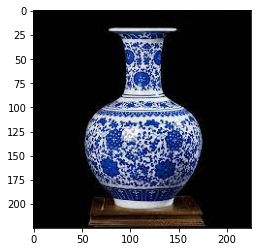

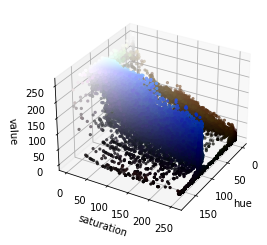

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

img = cv.imread('porcelain2.jfif')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

#convert img to hsv 
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h,s,v = cv.split(img_hsv)
fig = plt.figure()
axis = fig.add_subplot(1,1,1, projection="3d")

#normalize color
pixel_colors = img.reshape(img.shape[0]*img.shape[1], 3)
norm = colors.Normalize(vmin = 0., vmax = 1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(h.ravel(), s.ravel(), v.ravel(), facecolors = pixel_colors, marker = ".")
axis.view_init(30,30)
axis.set_xlabel('hue')
axis.set_ylabel('saturation')
axis.set_zlabel('value')
plt.show()

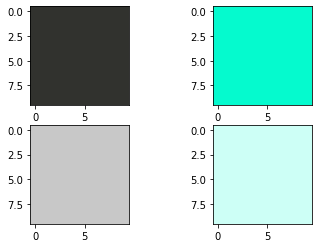

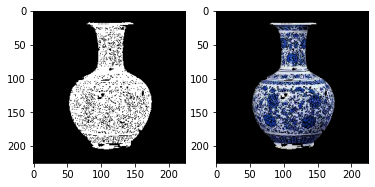

In [9]:
blue_light = (50,20,50)
blue_dark = (120,249,250)
white_light = (0, 0, 200)
white_dark = (120, 50, 255)

lightb_square = np.full((10,10,3), blue_light, dtype=np.uint8)/255
darkb_square = np.full((10,10,3), blue_dark, dtype=np.uint8)/255
lightw_square = np.full((10, 10, 3), white_light, dtype=np.uint8)/255
darkw_square = np.full((10, 10, 3), white_dark, dtype=np.uint8)/255

plt.subplot(2,2,1)
plt.imshow(hsv_to_rgb(lightb_square))
plt.subplot(2,2,2)
plt.imshow(hsv_to_rgb(darkb_square))
plt.subplot(2,2,3)
plt.imshow(hsv_to_rgb(lightw_square))
plt.subplot(2,2,4)
plt.imshow(hsv_to_rgb(darkw_square))
plt.show()


#hsv color segmentation
mask = cv.inRange(img_hsv, blue_light, blue_dark)
mask2 = cv.inRange(img_hsv, white_light, white_dark)

combine_mask = cv.bitwise_or(mask, mask2)
res = cv.bitwise_and(img, img, mask = combine_mask)

plt.subplot(1,2,1)
plt.imshow(combine_mask, 'gray')
plt.subplot(1,2,2)
plt.imshow(res)
plt.show()

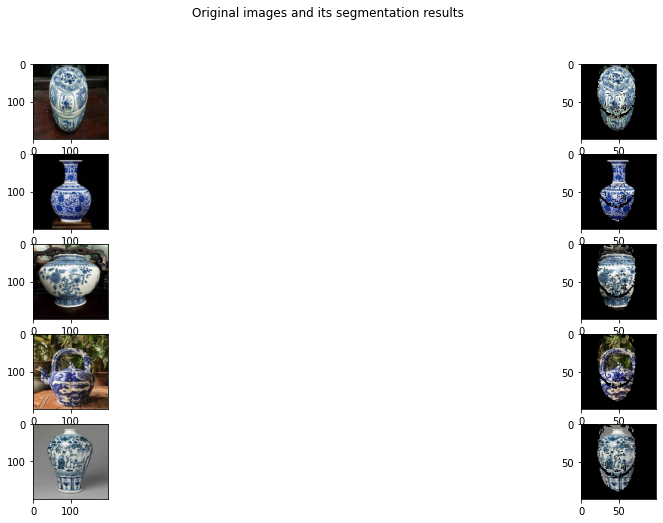

In [12]:
images_list = []

for i in range(0,5):
    img = cv.imread('porcelain'+str(i+1)+'.jfif')
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    img = cv.resize(img, (200,200), interpolation = cv.INTER_LINEAR)
    images_list.append(img)
    

#hsv color segmentation
mask = cv.inRange(img_hsv, blue_light, blue_dark)
mask2 = cv.inRange(img_hsv, white_light, white_dark)
combine_mask = cv.bitwise_or(mask, mask2) 
output_list = []

for i in range(0,5):
    img_hsv = cv.cvtColor(images[i], cv.COLOR_RGB2HSV) 
    res = cv.bitwise_and(img_hsv, img_hsv, mask=combine_mask)
    rgb = cv.cvtColor(res, cv.COLOR_HSV2RGB)
    output_list.append(rgb)
    
    
f, ax = plt.subplots(5, 2, figsize = (18, 8))
for i in range(5):
    ax[i][0].imshow(images_list[i])
    ax[i][1].imshow(output_list[i])

f.suptitle('Original images and its segmentation results')
plt.show()